In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


In [2]:
# Load the dataset from the local directory
df = pd.read_csv('diabetes.csv')  # Change the path to the correct location of your file

# Display the first few rows of the dataset
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check the data types and look for missing values
df.dtypes

# Check for missing values
df.isna().sum().sum()


0

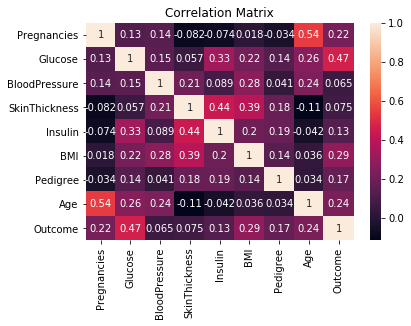

In [4]:
# Visualize the correlation matrix
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


In [5]:
# Split the dataset into training and testing sets
train, test = train_test_split(df, test_size = 0.2, shuffle = True)

# Define the features (X) and target (y) for training and testing
X_train, y_train = train.drop(['Outcome','BloodPressure','SkinThickness','Pedigree','Insulin'], axis='columns').values, train['Outcome'].values
X_test, y_test = test.drop(['Outcome','BloodPressure','SkinThickness','Pedigree','Insulin'], axis='columns').values, test['Outcome'].values


In [6]:
# Initialize KNN classifier and fit the model on the training data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [7]:
# Make predictions on the test set
y_pred = knn.predict(X_test)


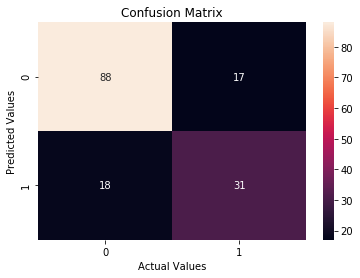

In [8]:
# Compute confusion matrix
conf = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
sns.heatmap(conf, annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix')
plt.show()


In [9]:
# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Compute precision score
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Compute recall score
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# Compute error rate (1 - accuracy)
error_rate = 1 - accuracy
print(f"Error Rate: {error_rate}")


Accuracy: 0.7727272727272727
Precision: 0.6458333333333334
Recall: 0.6326530612244898
Error Rate: 0.2272727272727273
